# Handwritten Digit Classification using Neural Network Intro 

In [1]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
(X_train , y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

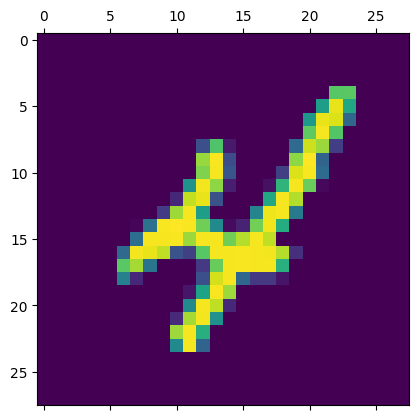

In [7]:
plt.matshow(X_train[9])

In [8]:
y_train[9]

4

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train = X_train / 255 
X_test = X_test / 255

In [11]:
# We need to flatten now because we want to convert 28 by 28 image in single dimensional array
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_test_flattened.shape

(10000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [16]:
model = Sequential([
    Dense(10, input_shape=(784,), activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Use X_train_flattened and y_train_one_hot for training
model.fit(X_train_flattened, y_train_one_hot, epochs=5)



Epoch 1/5


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4646 - accuracy: 0.8788
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.9256


In [17]:
model.evaluate(X_test_flattened, y_test_one_hot)

313/313 [==============================] - 1s 1ms/step - loss: 0.2684 - accuracy: 0.9259


[0.2683638334274292, 0.9258999824523926]

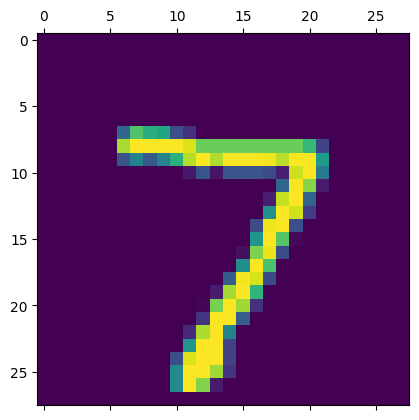

In [18]:
plt.matshow(X_test[0])

In [19]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.3485754e-02, 3.2819176e-07, 5.3556740e-02, 9.7348523e-01,
       2.1240734e-03, 1.6266988e-01, 1.7663162e-06, 9.9984461e-01,
       1.1389827e-01, 7.4327916e-01], dtype=float32)

In [20]:
np.argmax(y_predicted[0])

7

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [22]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [23]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    6,    4,    3,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   5,    8,  922,   16,    6,    6,   13,   13,   39,    4],
       [   3,    0,   17,  913,    0,   34,    3,   13,   19,    8],
       [   1,    1,    2,    2,  899,    0,   12,    7,   10,   48],
       [   7,    3,    2,   22,    7,  802,   12,    6,   25,    6],
       [  10,    3,    5,    1,    7,   18,  910,    2,    2,    0],
       [   1,    5,   21,    5,    2,    1,    0,  959,    2,   32],
       [  10,    8,    5,   21,    9,   37,    9,   13,  852,   10],
       [  11,    7,    1,    8,   15,    8,    0,   27,    5,  927]])>

Text(95.72222222222221, 0.5, 'Truth')

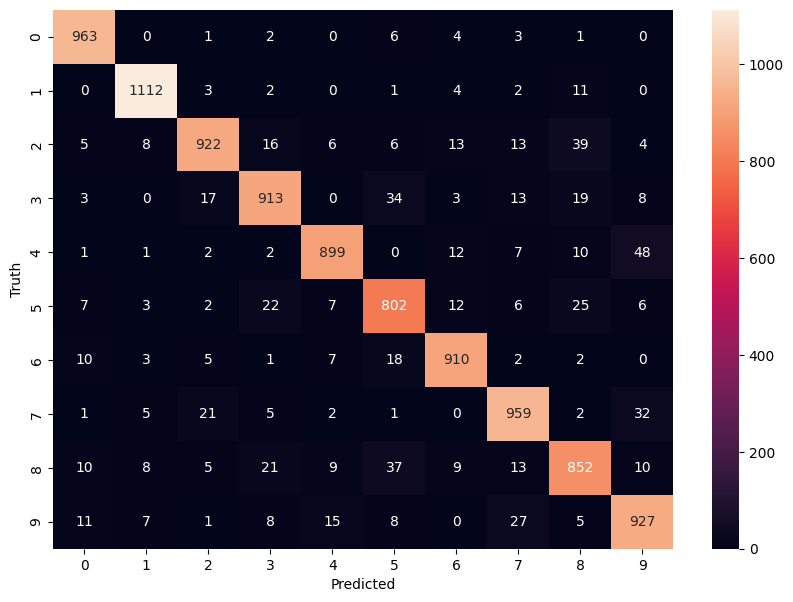

In [24]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [25]:
model = Sequential([
    Dense(100, input_shape=(784,), activation='relu'),
    Dense(10, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Use X_train_flattened and y_train_one_hot for training
model.fit(X_train_flattened, y_train_one_hot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2745 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1239 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0873 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0655 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0506 - accuracy: 0.9846


In [26]:
model.evaluate(X_test_flattened, y_test_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.0734 - accuracy: 0.9765


[0.07339752465486526, 0.9764999747276306]

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

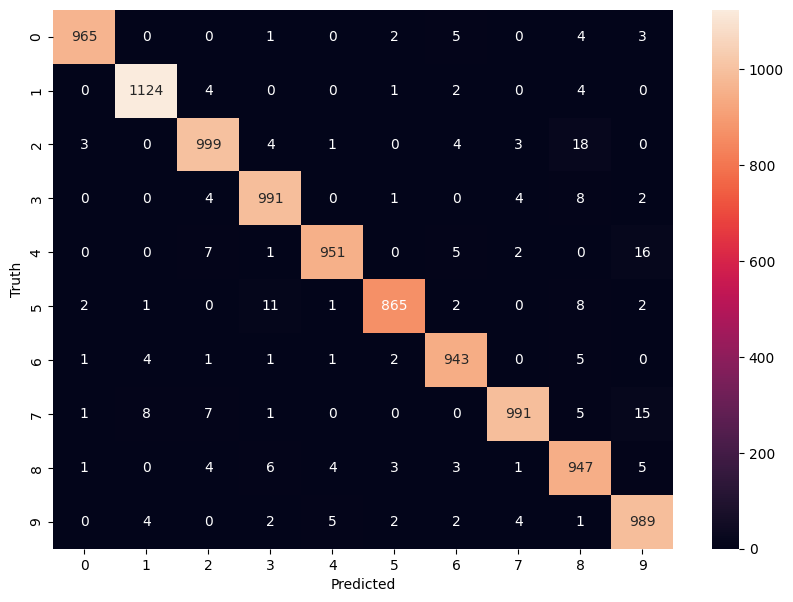

In [27]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")


In [28]:
model = Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    Dense(100, activation='relu'),
    Dense(10, activation='sigmoid')
])


# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Use X_train_flattened and y_train_one_hot for training
model.fit(X_train, y_train_one_hot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2747 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1248 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0858 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0643 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0523 - accuracy: 0.9835


__Using Tensoboard__  
_tensorboard --logdir logs/_ in cmd

In [30]:
model = Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    Dense(100, activation='relu'),
    Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir = "logs/",histogram_freq=1)
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Use X_train_flattened and y_train_one_hot for training
model.fit(X_train, y_train_one_hot, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2663 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1210 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0857 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0654 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0521 - accuracy: 0.9839
